# MDP(Markov Decision Process)
: 사람마다 행동을 하면서 이후 다른 행동이 유발되는 확률적 체인이 존재한다. 
기계도 마찬가지로 학습을 하면서 행동의 기준이 매번 조금씩 달라지게 된다. 기계의 기준을 '정책'이라고 한다.
MDP 내에서 reward를 설정해 탐색과 경험을 하면서 reward가 가장 높아지는 알고리즘을 따르게 됨
초반에는 무작위로 돌아가는 탐험에 할애하는 비중이 높다. 탐험에 주는 비율을 엡실론으로 정의한다. 반대로 정책에 할애하는 비율은 (1-엡실론)이 됨
MDP 문제점 -> 우리가 생각하는 상태-행동 패턴을 충분히 보여주지 못하고 있음

# 벨만 기대방정식
: 보상에 초점을 맞춰서
상태 S(t)-> 시간 t에서 agent의 상태정보
행동 A(t) -> 시간 t 내에서 가능한 모든 agent의 행동
보상 R(t+1) -> 보상은 정책에 의하여 확률적으로 변동되기 때문에 기대값을 구한다.

(Rs)^a = E[Rt+1| S(t) = s, A(t) = a]
현재 상태 S에서 행동 A를 취했을 때의 보상은 Rt+1.
이러한 보상은 확률적으로 별동함. 
Rs^a 는 현재상태 s에서 a를 취했을 때의 보상을 의미함.

(Pss')^a = P[St+1 = s'|S(t) = s, A(t) = a]
(Pss')a -> 상태전이확률을 의미. s 상태에서 행동 a를 취해서 s'으로 상태가 변하는 것

정책함수 pie(s,a)는 현재 상태에서 agent가 취할 수 있는 행동들의 확률을 의미함.

최적의 정책은 모든 상태에 대하여 보상(가치함수)를 최대화하는 정책이다.
현재까지 업데이터 된 정책에 의하여 어떤 상태에서 가능한 모든 행동들의 보상 합을 Gt로 표현한다. 

E(Gt|St = s) = Vs = 현재상태 s에서의 가치함수

행동기준: 모든 상태에서의 가치함수를 구한 후 현재 상태에서 가능한 행동에 의한 상태로 갈 때에 가장 가치함수가 높은 것을 선택.
 Gt = Rt+1 + gamma(Gt+1)
가치함수는 정책에 근거하여 항상 업데이트가 되므로, 정책 기호를 붙여 다음과 같이 표현한다.
(Vs)^pie = Epie[Gt|St = s]
위 식의 벨만의 기대 방정식이라고 한다.


상태와 행동에 따라 달라지는 가치함수를 큐 함수 Q(s,a)로 부른다.
Vs^pie =  Epie(a|s)[Q^pie(s,a)]

# 가치함수의 벨만 최적 방정식

Q(s,a)가 최적이 아니라면 아무리 max 값을 선택해도 V(s)는 최대가 되지 않는다.
기대 방정식에서 최적이 되는 행동 a 를 찾는 방정식을 가치함수의 벨만 최적방정식이라고 부른다.
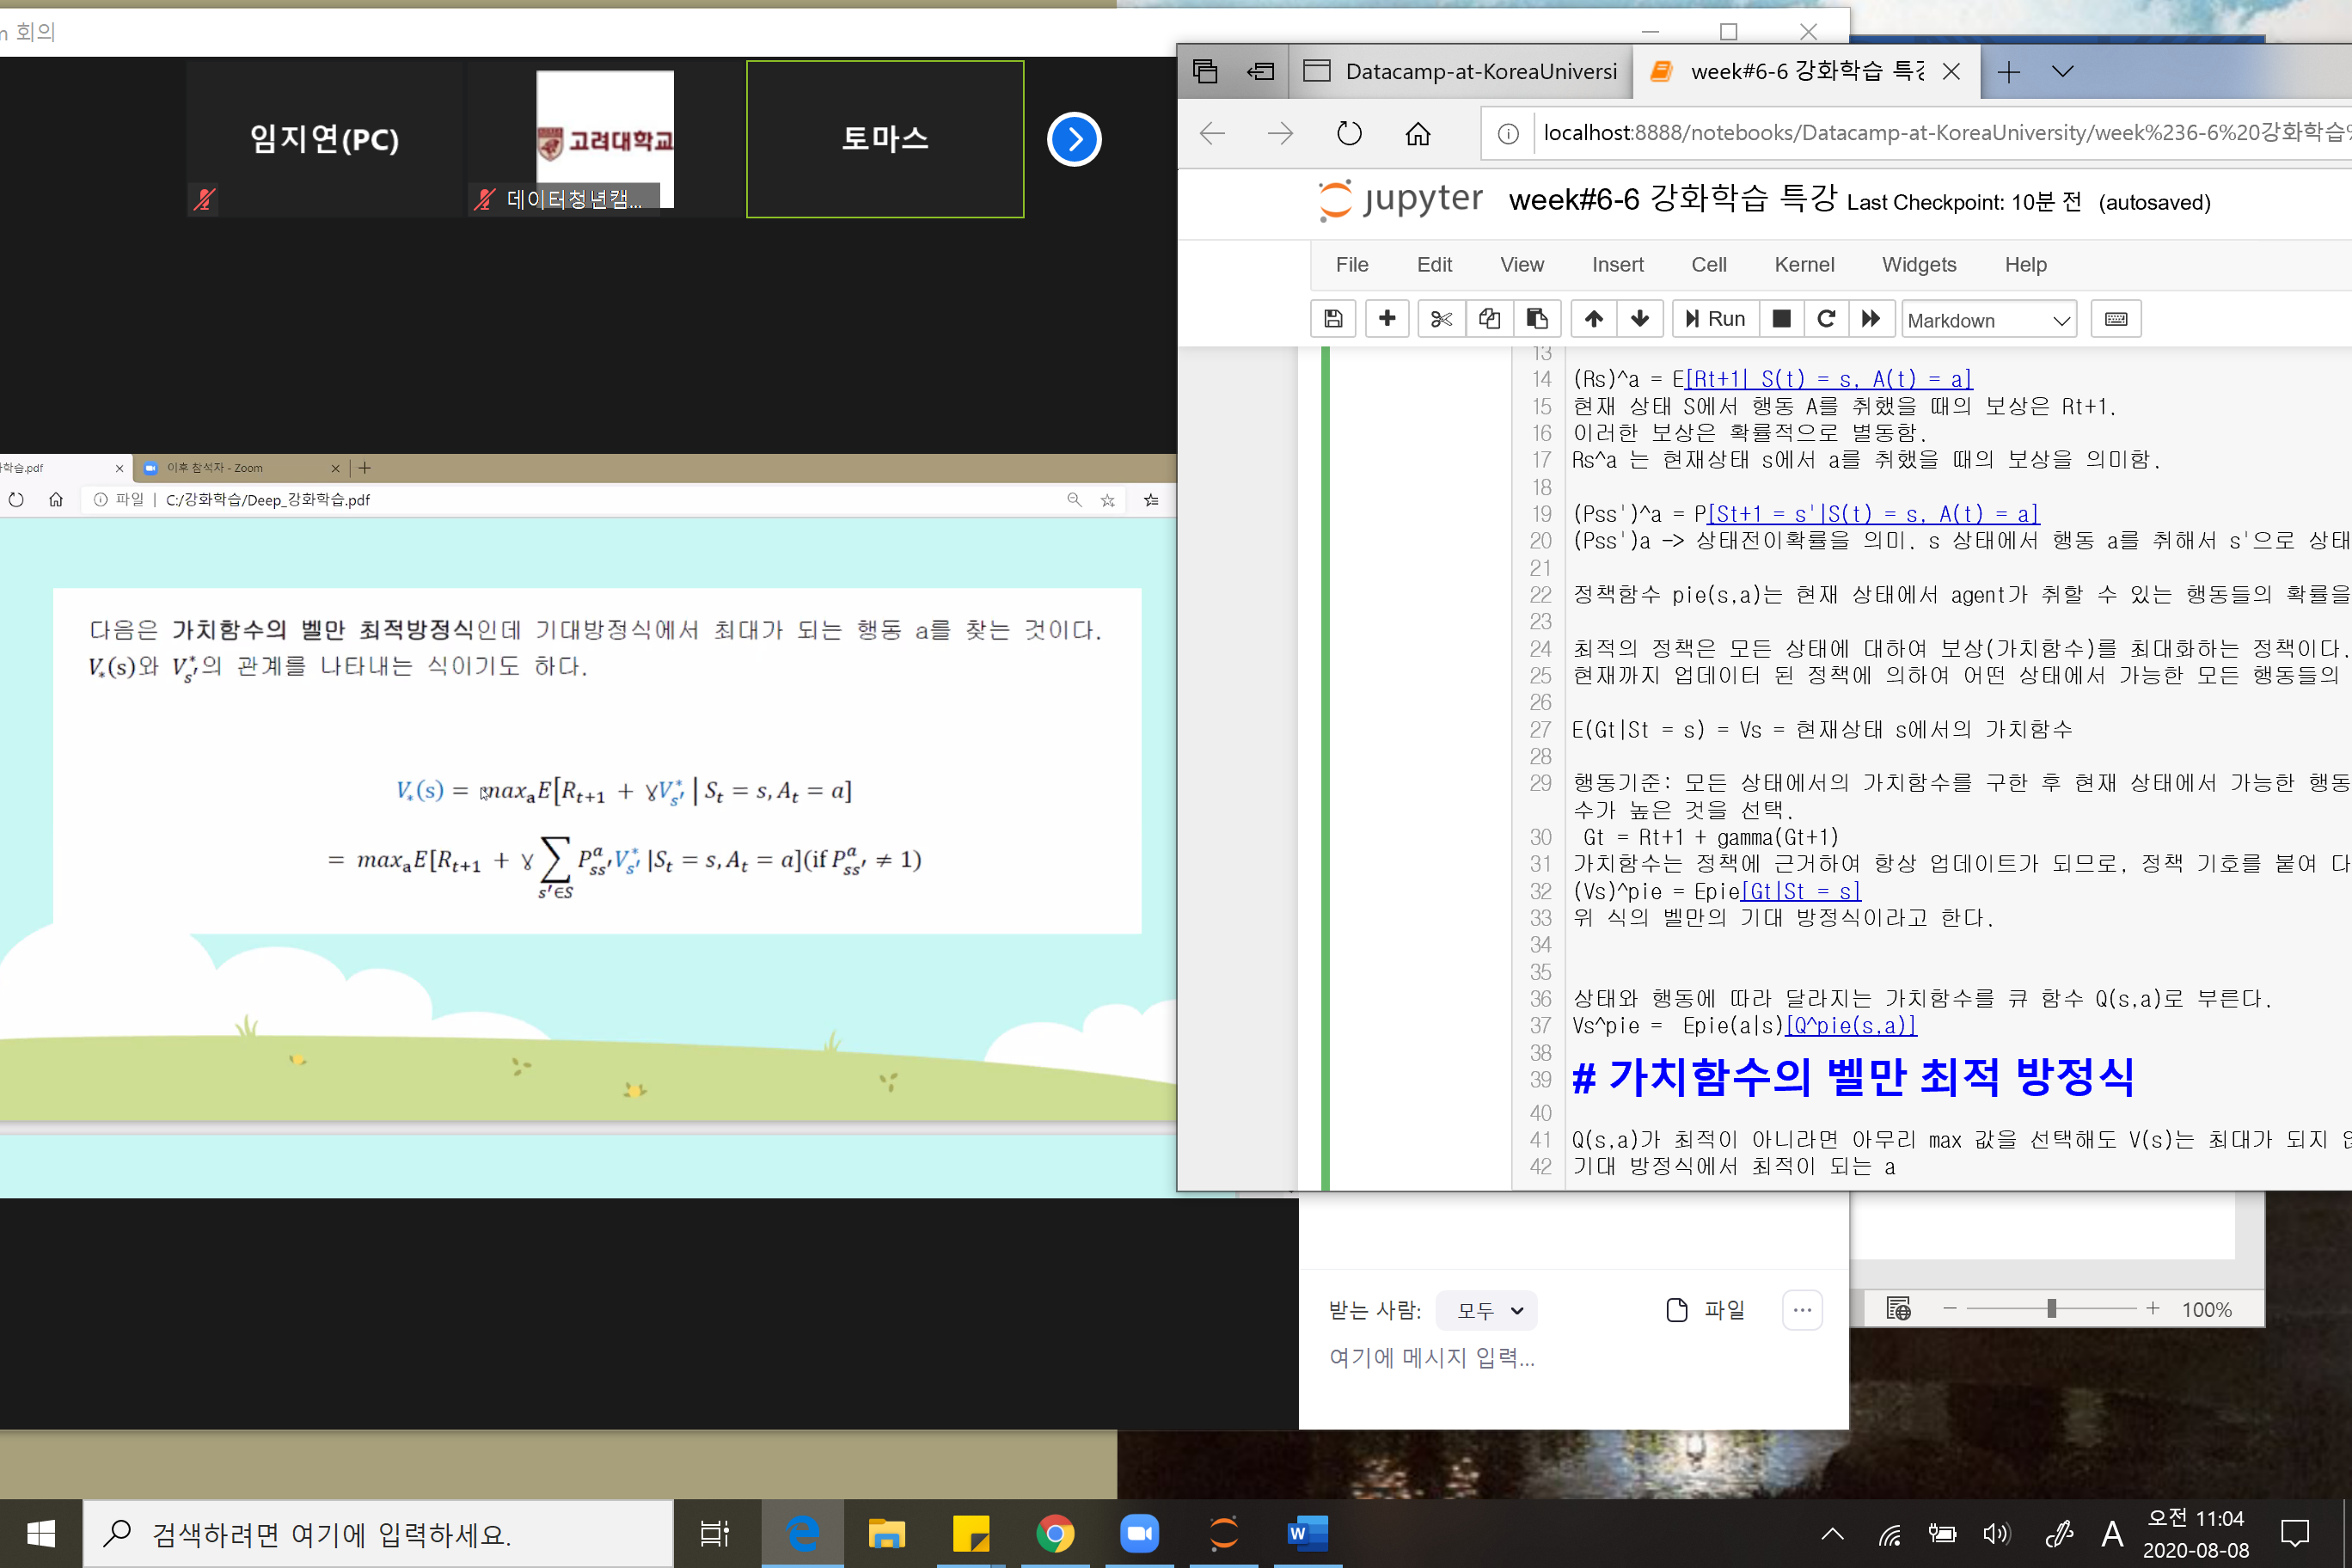

# 동적 프로그래밍

Value Iteration  : 벨만의 최적 방정식 스타일
Policy Iteration : 벨만의 기대 방정식 스타일

<동적프로그래밍>
정책평가: 최적방정식
기대값을 뽑아서 정책을 평가함

가치반복법
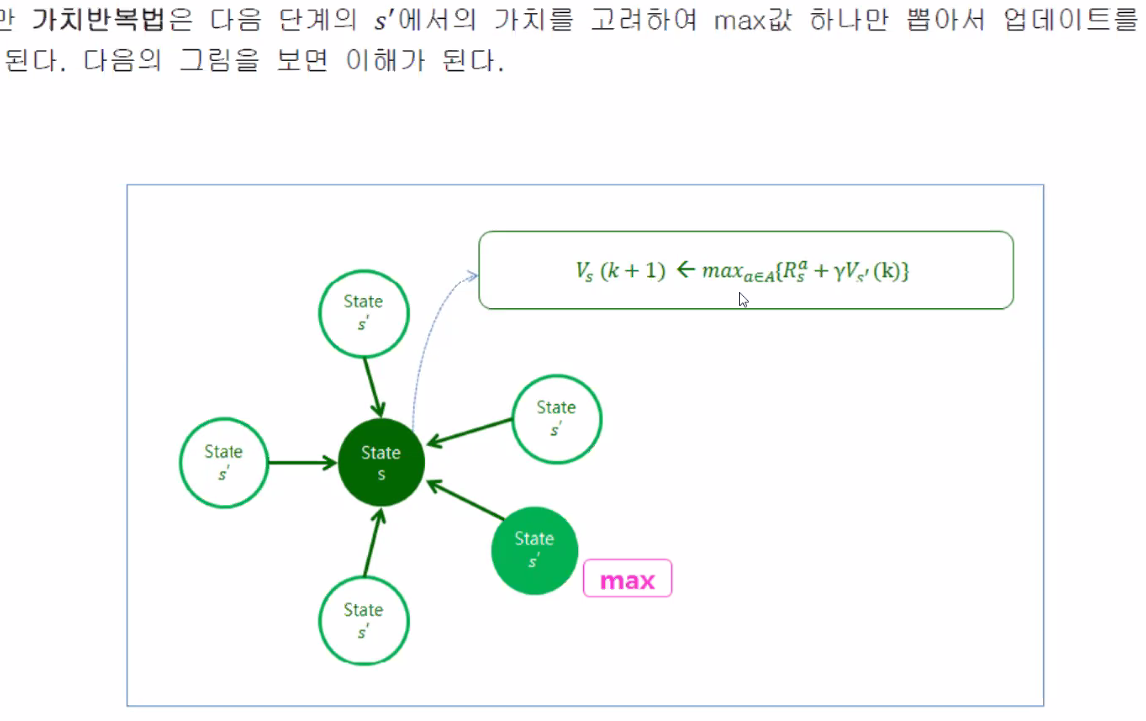
가장 좋은 정책만 뽑아서 
정책을 따라 저장하는 변수는 두지 않음. 기대값을 저장하는 것이 아니라 최대값만 저장하기 때문에

문제점->환경에 대한 완전한 정보가 있어야 하기 때문에 현실문제에 적합하지 않음
상태정보를 계산할 때 복잡도가 커질 수록 계산량이 너무 많아짐
Rs^a와 Pss'^a를 현실에서 알아낼 방법이 없음




# 몬테카를로 방법

충분한 시간까지 agent가 탐험을 하도록 시켜서 t시점에서 예상한 전체 시간에서의 reward Gt를 얻는다. 
이렇게 한 번의 path를 훑고 지나가면 에피소드가 완성됨.
여러번 반복해서 하나의 상태 s에 대한 Gs를 얻는다. 
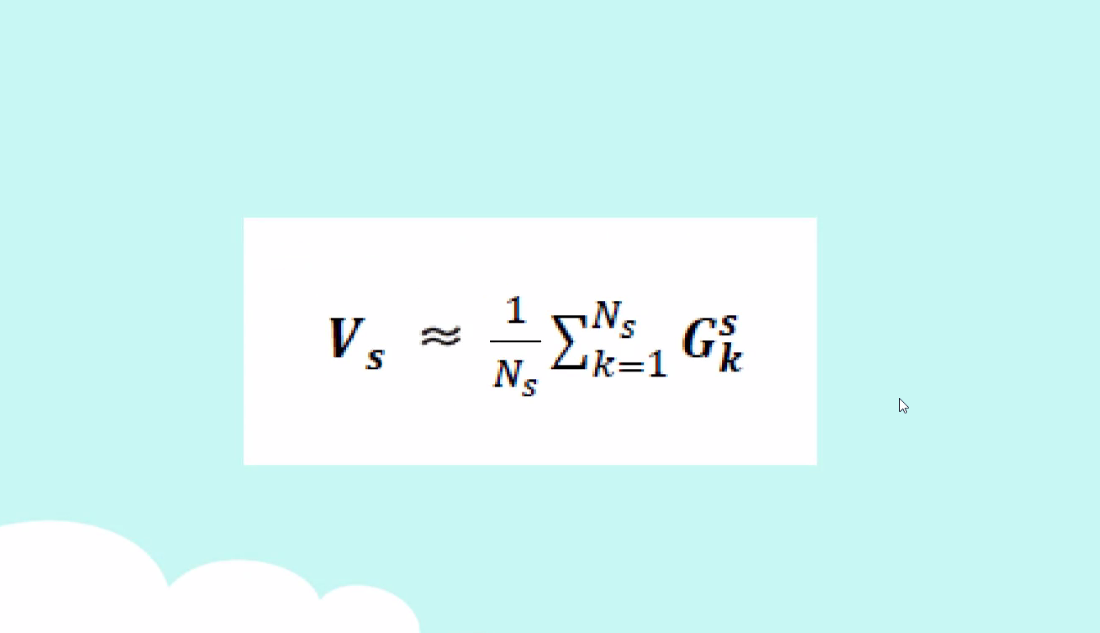
n은 상태 s의 방문횟수를 의미

문제점 -. episode가 끝나야 계산을 시작할 수 있는데 episode가 길면 업데이트 하는 시간이 오래 거릶

# 시간차 예측방법

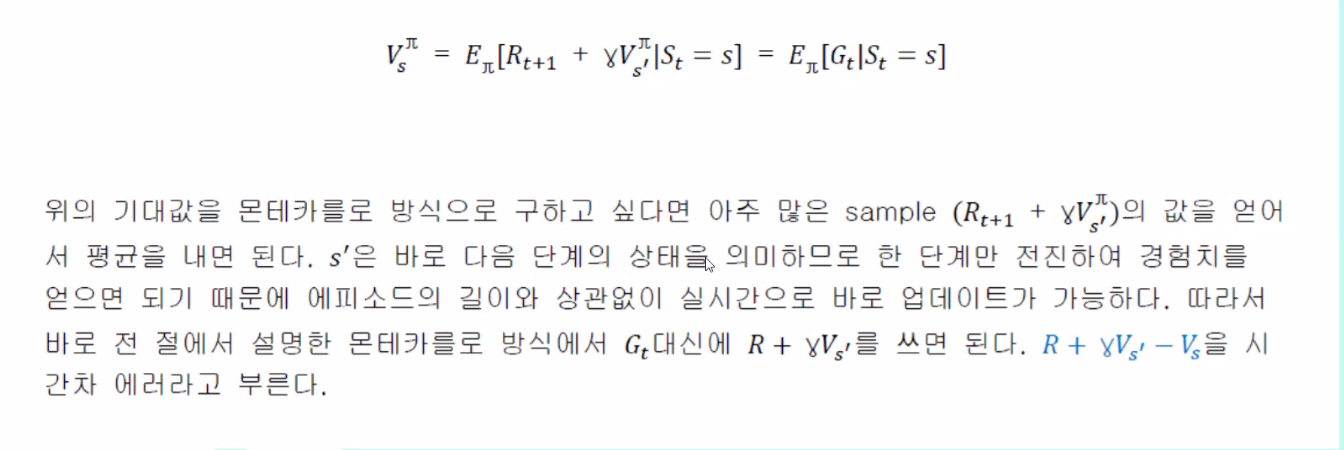
멀리 갈 필요 없이 s'까지만 가서 새로운 V값을 예측함.
몬테카를로 예측보다는 빠르지만 샘플의 개수가 많이 필요함.


# SARSA와 Q 러닝

1. SARSA : 시간차예측방법의 변형으로 가치함수 대신 Q함수를 사용한 것
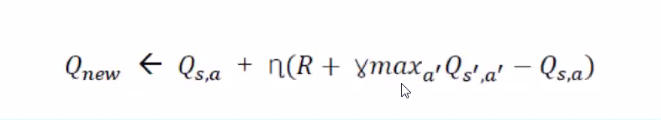

현재상태에서 가장 높은 Q함수값을 갖는 행동을 선택하게 되는데, 엡실론 비율만큼 이것을 무시하고 무작위의 행동을 선택하게 만든다. 어느 정도의 경험이 쌓이면 엡실론 수치를 줄여서 거의 경험에만 의존해 행동을 결정하게 된다. 이것을 엡실론-greedy정책이라고 부른다.
SARSA의 문제-> 초기에 경험이 없는 상태에서 무작위로 행동을 하다가 잘못된 학습으로 Q함수를 업데이트하여 오랫동안 잘못된 해에 갇혀버리는 경우가 생긴다.


이를 빠져나갈 수 있게 해결한 것이 Q 러닝 방법이다. 

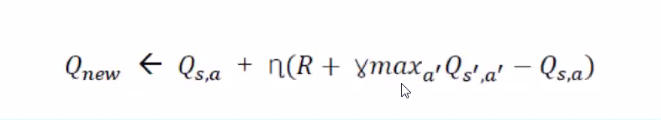

상태 s 에서 a를 구할 때는 엡실론을 무작위로 선택하지만, 다음 상태 s'에서는 이를 허용하지 않고 가장 큰 Q 값을 활용하게 한다. 



# Deep SARSA

